# Image Search from Hindi, Spanish, and French Text Data

SentenceTransformers provides models that allow to embed images and text into the same vector space. This allows to find similar images as well as to implement image search.




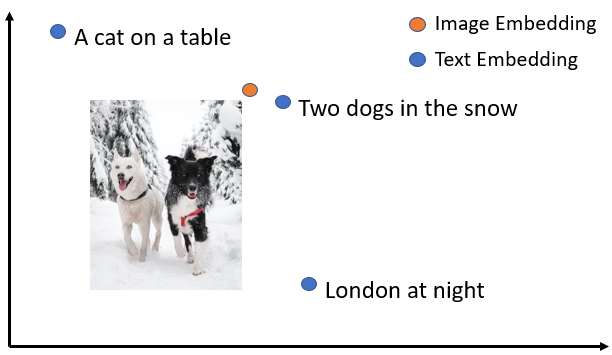

we use the OpenAI CLIP Model, which was trained on a large set of images and image alt texts.

https://github.com/openai/CLIP

we use the Unsplash Dataset Lite, which contains about 25k images.

https://unsplash.com/data

https://github.com/unsplash/datasets

http://sbert.net/datasets/

https://public.ukp.informatik.tu-darmstadt.de/reimers/sentence-transformers/datasets/unsplash-25k-photos.zip

The original CLIP Model only works for English, hence, we used Multilingual Knowlegde Distillation to make this model work with 50+ languages.

https://arxiv.org/abs/2004.09813

#### Pretrained Models
https://www.sbert.net/docs/pretrained_models.html

In [ ]:
%pip install sentence_transformers

In [ ]:
from sentence_transformers import SentenceTransformer, util
from PIL import Image
import matplotlib.pyplot as plt
import glob
import torch
import os

In [ ]:
!wget https://public.ukp.informatik.tu-darmstadt.de/reimers/sentence-transformers/datasets/unsplash-25k-photos.zip

In [ ]:
!unzip 'unsplash-25k-photos.zip' -d 'photos'

In [ ]:
img_names = list(glob.glob('photos/*.jpg'))[:2000]
print(len(img_names))

2000


In [ ]:
img_names[0]

'photos/zSGFGTed0zw.jpg'

In [ ]:
img_model = SentenceTransformer('clip-ViT-B-32')

In [ ]:
img_embed = img_model.encode([Image.open(img) for img in img_names], batch_size=32, convert_to_tensor=True, show_progress_bar=True)

Batches:   0%|          | 0/63 [00:00<?, ?it/s]

In [ ]:
model = SentenceTransformer('clip-ViT-B-32-multilingual-v1')

In [ ]:
img_folder = '/photos'

In [ ]:
def search(query, top_k=3):
  query_embed = model.encode([query], convert_to_tensor=True)

  hits = util.semantic_search(query_embed, img_embed, top_k=top_k)[0]

  # print(hits)

  print('Query: ', query)
  for hit in hits:
    img_path = img_names[hit['corpus_id']]
    print(img_path)

    im = Image.open(img_path)
    plt.figure()
    plt.imshow(im)
    plt.show()

Query:  Palme
photos/b0J8OosDzrY.jpg


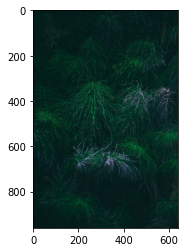

photos/CLACWnwpx24.jpg


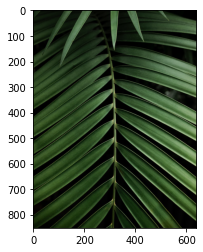

photos/20lx7yFMPdQ.jpg


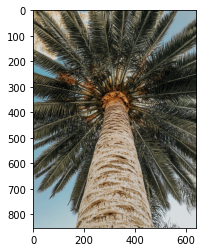

In [ ]:
search('Palme')